<a href="https://colab.research.google.com/github/ShubhDixit20/Sagemaker_test/blob/main/Code%20for%20Model%20Training%20dtd.%2019-07-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
ls

drive/  sample_data/


In [3]:
cd ..

/


In [4]:
cd content

/content


In [7]:
cd MyDrive

/content/drive/MyDrive


In [8]:
cd Cow Neck AI

/content/drive/MyDrive/Cow Neck AI


In [ ]:
pip install -r requirements.txt

In [6]:
!pwd

/


In [10]:
cd MyDrive

/content/drive/MyDrive


In [11]:
import sys
import time
import threading
import atexit
import os
import shutil
import pandas as pd
import os
import copy
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import *
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
from math import *
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm

In [31]:
class App():
    def __init__(self):
        super().__init__()

        # atexit.register(self.exit_handler)

        self.ProjectName = str()
        self.ExperimenterName = str()
        self.ProjectDate = str()
        self.MainDirectory = str()
        self.ModelPath = str()
        self.DataPath = str()
        self.PlotsPath = str()
        self.script_dir = os.path.abspath(self.DataPath)
        self.MetricsPath = os.path.join(self.script_dir, "Metrics")
        self.FeaturePath = os.path.join(self.script_dir, "FeaturePath")
        self.RawDataDirectory = os.path.join(self.script_dir, "RawData")
        self.ResultPath = str()
        self.SamplingRate = str()
        self.WindowSize = str()
        self.StepSize = str()
        self.ClassNames = str()
        self.ModelName = "RandomForestClassifier"
        self.TrainValRatio = 0.2
        self.TrainedModelPath = str()
        self.FilePath_BehaviorAnalysis = str()
        # self.progress_callback = self.update_progress

    def displayEvaluationResults(self):
        # MetricsPath = self.MetricsPath + "Metrics_" + str(self.ModelName) + '_' + str(self.TrainValRatio) + ".csv"
        fileName_eval = "Metrics_" + str(self.ModelName) + '_' + str(self.TrainValRatio) + ".csv"
        filepath1 = os.path.join(self.MetricsPath, fileName_eval)
        print("metrics path: ", filepath1)

        data = pd.DataFrame(pd.read_csv(filepath1, index_col=0))
        av_precision = round(data.loc["macro avg", "precision"] * 100, 1)
        av_recall = round(data.loc["macro avg", "recall"] * 100, 1)
        av_f1_score = round(data.loc["macro avg", "f1-score"] * 100, 1)
        weighted_precision = round(data.loc["weighted avg", "precision"] * 100, 1)
        weighted_recall = round(data.loc["weighted avg", "recall"] * 100, 1)
        weighted_f1_score = round(data.loc["weighted avg", "f1-score"] * 100, 1)
        overall_accuracy = round(data.loc["accuracy", "support"] * 100, 1)
    #     figurepath = self.PlotsPath + "/ConfusionMatrix_" + str(self.ModelName) + '_' + str(self.TrainValRatio) + ".png"
    #     self.ui.image_ConfusionMatrix.setPixmap(QPixmap(figurepath))
        print("av_precision: ",av_precision," \nav_recall: ",av_recall,"\nav_f1score: ",av_f1_score,"\nweighted_precision: ",weighted_precision,"\nweighted_recall: ",weighted_recall,"\nweighted_f1score: ",weighted_f1_score,"\noverall_accuracy: ",overall_accuracy)
        print("Evaluation was completed")

    # def visualizeBehaviorResults(self):
    #     ResultPath = self.ResultPath + "/TimeBudget.txt"
    #     data = pd.DataFrame(pd.read_csv(ResultPath, index_col=0))
    #     data_index = data.index
    #     self.ui.QLabel_Top_1_Name.setText(str(data_index[0] + " (second)"))
    #     self.ui.QLabel_Top_2_Name.setText(str(data_index[1] + " (second)"))
    #     self.ui.QLabel_Top_3_Name.setText(str(data_index[2] + " (second)"))
    #     self.ui.LineEdit_Top_1_Behavior.setText(str(data.iloc[0][0]))
    #     self.ui.LineEdit_Top_2_Behavior.setText(str(data.iloc[1][0]))
    #     self.ui.LineEdit_Top_3_Behavior.setText(str(data.iloc[2][0]))
    #     figurepath = self.PlotsPath + "/BehaviorResults.png"
    #     self.ui.image_BehaviorBudget.setPixmap(QPixmap(figurepath))

    ######################## BACKEND #####################################
    def FeatureExtraction(self):

        #After which we will have to create a dataframe that will help us to extract features & train the model.
        # warnings.filterwarnings("ignore")
        filename = 'cow2.csv'
        filepath = os.path.join(self.RawDataDirectory, filename)
        df = pd.read_csv(filepath)
        # self.SamplingRate, self.StepSize, self.WindowSize = input("Enter 3 values: ").split()
        self.SamplingRate = 25
        self.StepSize = 1
        self.WindowSize = 1
        WindowLength = int(int(self.SamplingRate) * float(self.WindowSize))
        StepLength = int(round(int(self.SamplingRate) * float(self.StepSize)))
        data_combined = pd.DataFrame()

        lst = [self.SamplingRate, self.WindowSize, self.StepSize, WindowLength, StepLength]
        lst_df = pd.DataFrame(lst, index=['SamplingRate', 'WindowSize', 'StepSize', 'WindowLength', 'StepLength'], columns=['KeyParameters'])
        lst_save_name = self.MainDirectory + "/KeyParameters_DataProcessing.csv"
        lst_df.to_csv(lst_save_name)

        test_object = Path(filepath).stem
        data = pd.DataFrame(pd.read_csv(filepath))
        labels = data['Label']
        data_formatted = data.drop(['Label'], axis=1).copy()
        print(data_formatted)
        range_end = len(data_formatted) - WindowLength
        data_temp = pd.DataFrame()

        #All the above in this function has to be replaced with the snippet for accessing the csv file saved in s3 bucket.

        for i in tqdm(range(0, range_end, StepLength)):
            # if(i==4)
            # {
            # if labels.loc[i]==nan:
            #     continue
            data_selected = data_formatted[['AccX', 'AccY', 'AccZ']][i: i + WindowLength]
            # features
            data_kurt = data_selected.kurtosis()
            # print(data_kurt)
            # data_mad = data_selected.mad()
            data_mean = data_selected.mean()
            # print(data_mean)
            data_median = data_selected.median()
            data_min = data_selected.min()
            data_max = data_selected.max()
            #print("data_min: ",data_min)
            #print("data_max: ", data_max)
            data_quan_25 = data_selected.quantile(q=0.25)
            #print("data_25:",data_quan_25)
            data_quan_50 = data_selected.quantile(q=0.5)
            #print("data_50:",data_quan_50)
            data_quan_75 = data_selected.quantile(q=0.75)
            #print("data_75:",data_quan_75)
            data_skew = data_selected.skew()
            #print("data_skew: ",data_skew)
            data_sum = data_selected.sum()
            #print("data_sum:",data_sum)
            data_std = data_selected.std()
            #print("data_std:",data_std)
            data_var = data_selected.var()
            #print("data_var:",data_var)
            SignalMagnitudeArea = abs(data_formatted.loc[i][2]) + abs(data_formatted.loc[i][3]) + abs(data_formatted.loc[i][4])
            VectorMagnitude = sqrt(abs(data_formatted.loc[i][2] + data_formatted.loc[i][3] + data_formatted.loc[i][4]))
            MovementVariation = abs(data_formatted.loc[i+1][2]-data_formatted.loc[i][2]) + abs(data_formatted.loc[i+1][3]-data_formatted.loc[i][3]) + abs(data_formatted.loc[i+1][4]-data_formatted.loc[i][4])
            Energy = ((data_formatted.loc[i][2])**2 + (data_formatted.loc[i][3])**2 + (data_formatted.loc[i][4])**2)**2
            Entropy = (1+(data_formatted.loc[i][2] + data_formatted.loc[i][3] + data_formatted.loc[i][4]))**2 * log(abs(1+data_formatted.loc[i][2] + data_formatted.loc[i][3] + (data_formatted.loc[i][4])**2))
            # SignalMagnitudeArea = abs(int(data_formatted.loc[i][1])) + abs(int(data_formatted.loc[i][2])) + abs(int(data_formatted.loc[i][3]))

            # VectorMagnitude = sqrt(abs(data_formatted.loc[i][0] + data_formatted.loc[i][1] + data_formatted.loc[i][2]))

            # MovementVariation = abs(data_formatted.loc[i][0]-data_formatted.loc[i+1][0]) + abs(data_formatted.loc[i][1]-data_formatted.loc[i+1][1]) + abs(data_formatted.loc[i][2]-data_formatted.loc[i+1][2])

            # Energy = ((data_formatted.loc[i][0])**2 + (data_formatted.loc[i][1])**2 + (data_formatted.loc[i][2])**2)**2

            # Entropy = (1+(data_formatted.loc[i][0] + data_formatted.loc[i][1] + data_formatted.loc[i][2]))**2 * log(abs(1+data_formatted.loc[i][0] + data_formatted.loc[i][1] + (data_formatted.loc[i][2])**2))

            # data_combined_hor = pd.concat(
            #     [pd.Series(test_object), pd.Series(labels.loc[i]), pd.Series(data_formatted.loc[i][2]),pd.Series(data_formatted.loc[i][3]),pd.Series(data_formatted.loc[i][4]),
            #     data_kurt[1:], data_mean[1:], data_median[1:], data_min[2:], data_max[2:], data_quan_25[1:4],
            #     data_quan_50[1:4], data_quan_75[1:4], data_skew[1:], data_sum[2:], data_std[1:], data_var[1:],
            #     pd.Series(SignalMagnitudeArea), pd.Series(VectorMagnitude), pd.Series(MovementVariation), pd.Series(Energy), pd.Series(Entropy)], axis=0, ignore_index=True)

            # data_temp = pd.concat([data_temp, data_combined_hor], ignore_index=True)

            # data_combined_hor = pd.concat(
            #     [pd.Series(test_object), pd.Series(labels.loc[i]), pd.Series(data_formatted.loc[i][2]),pd.Series(data_formatted.loc[i][3]),pd.Series(data_formatted.loc[i][4]),
            #     pd.Series(data_kurt[1]),pd.Series(data_kurt[2]),pd.Series(data_kurt[3]), pd.Series(data_mad[1]),pd.Series(data_mad[2]),pd.Series(data_mad[3]), pd.Series(data_mean[1]),pd.Series(data_mean[2]),pd.Series(data_mean[3]), pd.Series(data_median[1]),pd.Series(data_median[2]),pd.Series(data_median[3]), pd.Series(data_min[2]),pd.Series(data_min[3]),pd.Series(data_min[4]), pd.Series(data_max[2]),pd.Series(data_max[3]),pd.Series(data_max[4]), pd.Series(data_quan_25[1]),pd.Series(data_quan_25[2]),pd.Series(data_quan_25[3]),
            #     pd.Series(data_quan_50[1]),pd.Series(data_quan_50[2]),pd.Series(data_quan_50[3]), pd.Series(data_quan_75[1]),pd.Series(data_quan_75[2]),pd.Series(data_quan_75[3]), pd.Series(data_skew[1]),pd.Series(data_skew[2]),pd.Series(data_skew[3]), pd.Series(data_sum[2]),pd.Series(data_sum[3]),pd.Series(data_sum[4]), pd.Series(data_std[1]),pd.Series(data_std[2]),pd.Series(data_std[3]), pd.DataFrame(data_var[1:]).transpose(),
            #     pd.Series(SignalMagnitudeArea), pd.Series(VectorMagnitude), pd.Series(MovementVariation), pd.Series(Energy), pd.Series(Entropy)], axis=1, ignore_index=True)

            data_combined_hor = pd.concat(
                [pd.Series(test_object), pd.Series(labels.loc[i]), pd.Series(data_formatted.loc[i][2]),pd.Series(data_formatted.loc[i][3]),pd.Series(data_formatted.loc[i][4]),
                pd.Series(data_kurt[0]),pd.Series(data_kurt[1]),pd.Series(data_kurt[2]), pd.Series(data_mean[0]),pd.Series(data_mean[1]),pd.Series(data_mean[2]), pd.Series(data_median[0]),
                pd.Series(data_median[1]),pd.Series(data_median[2]), pd.Series(data_min[0]),pd.Series(data_min[1]),pd.Series(data_min[2]), pd.Series(data_max[0]),pd.Series(data_max[1]),
                pd.Series(data_max[2]), pd.Series(data_quan_25[0]),pd.Series(data_quan_25[1]),pd.Series(data_quan_25[2]),
                pd.Series(data_quan_50[0]),pd.Series(data_quan_50[1]),pd.Series(data_quan_50[2]), pd.Series(data_quan_75[0]),pd.Series(data_quan_75[1]),pd.Series(data_quan_75[2]),
                pd.Series(data_skew[0]),pd.Series(data_skew[1]),pd.Series(data_skew[2]), pd.Series(data_sum[0]),pd.Series(data_sum[1]),pd.Series(data_sum[2]),
                pd.Series(data_std[0]),pd.Series(data_std[1]),pd.Series(data_std[2]), pd.DataFrame(data_var[0:]).transpose(),
                pd.Series(SignalMagnitudeArea), pd.Series(VectorMagnitude), pd.Series(MovementVariation), pd.Series(Energy), pd.Series(Entropy)], axis=1, ignore_index=True)

            data_temp = pd.concat([data_temp,data_combined_hor], ignore_index=True,axis=0)

        # data_combined = pd.concat([data_combined, data_temp], ignore_index=True)
        # print(data_combined)

        data_temp.columns = ['test_object', 'label', 'AccX', 'AccY', 'AccZ', 'AccX_kurt', 'AccY_kurt', 'AccZ_kurt', 'AccX_mean', 'AccY_mean', 'AccZ_mean', 'AccX_median', 'AccY_median',
                                'AccZ_median', 'AccX_min', 'AccY_min', 'AccZ_min', 'AccX_max', 'AccY_max', 'AccZ_max',
                                'AccX_quan_25', 'AccY_quan_25', 'AccZ_quan_25', 'AccX_quan_50', 'AccY_quan_50', 'AccZ_quan_50',
                                'AccX_quan_75', 'AccY_quan_75', 'AccZ_quan_75', 'AccX_skew', 'AccY_skew', 'AccZ_skew', 'AccX_sum',
                                'AccY_sum', 'AccZ_sum', 'AccX_std', 'AccY_std', 'AccZ_std', 'AccX_var', 'AccY_var', 'AccZ_var',
                                'SignalMagnitudeArea', 'VectorMagnitude', 'MovementVariation', 'Energy', 'Entropy']
        filename = os.path.join(self.FeaturePath, "features.txt")
        data_temp.to_csv(self.FeaturePath + "features.csv", sep=',', index=False)

    # def CheckDataBalance(self):
    #     sns.set()
    #     filename = os.path.join(self.FeaturePath, "features.csv")
    #     data = pd.DataFrame(pd.read_csv(filename))
    #     data = data.dropna(axis=0)
    #     prob = data['label'].value_counts()
    #     print(prob)
    #     # prob.plot(kind='bar')
    #     # plt.xticks(rotation=25)
    #     # plt.xlabel('Class names')
    #     # plt.ylabel('Counts of data points')
    #     # plt.tight_layout()
    #     figurename = self.PlotsPath + "/ClassCountsPlot.png"
    #     # plt.savefig(figurename)
    #     # plt.show()

    #     # Create a QChart instance
    #     chart = QChart()

    #     # Create a QBarSeries for the bar chart
    #     bar_series = QBarSeries()

    #     # Create a QBarSet with data for the bars
    #     bar_set = QBarSet("Behaviour Labels")
    #     bar_set.append(prob)

    #     # Add the bar set to the bar series
    #     bar_series.append(bar_set)

    #     # Add the bar series to the chart
    #     chart.addSeries(bar_series)

    #     # Create a QBarCategoryAxis and set categories on it
    #     axis = QBarCategoryAxis()
    #     axis.append(prob.index.values)

    #     # Set the category axis on the chart
    #     chart.createDefaultAxes()
    #     chart.setAxisX(axis)

    #     # Create a QChartView to display the chart
    #     chart_view = QChartView(chart)

    #     # Create a QVBoxLayout and add the chart view
    #     self.layout2.addWidget(chart_view)

    # def ClassCombination(self, FeaturePath, ClassNames):
    #     filename = FeaturePath + "/features.txt"
    #     data = pd.DataFrame(pd.read_csv(filename))
    #     data.dropna(axis=0, inplace=True)
    #     # data.reset_index(drop=True, inplace=True)
    #     # label = data['Label'].tolist()
    #     # label_set = set(label)
    #     # unique_list = list(label_set)
    #     # print(data['Label'].unique())
    #     # print(data.head(50))
    #     # print(unique_list)
    #     # print(len(data))
    #     combination_list = ClassNames
    #     # for i in range(len(data)):
    #     #     if data.iat[i, 1] in combination_list:
    #     #         data.iat[i, 1] = 'others'
    #     for combined_label in combination_list:

    #         # print(combined_label)
    #         data.loc[(data['label'] == combined_label), 'label'] = 'Others'
    #         # data = data.replace({'Label': {combined_label:'others'}})
    #     # print(data['Label'].unique())
    #     filename_combined = FeaturePath + "/features_combined.txt"
    #     # print(len(data))
    #     data.to_csv(filename_combined, sep=',', index=False)
    #     print("Data cleaning is completed!")

    def ModelTraining(self):
        #sns.set()
       # warnings.filterwarnings("ignore")
        TrainValRatio = 0.2
        filename = 'features.csv'
        filepath = os.path.join(self.FeaturePath, filename)
        data = pd.DataFrame(pd.read_csv(filepath))
        data = data.dropna()
        data = data.reset_index(drop=True)
        labels = data["label"]
        features = data.drop(["test_object", "label"], axis=1).copy()
        oversample = RandomOverSampler(sampling_strategy='minority')
        features,labels = oversample.fit_resample(features,labels)

        X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=float(TrainValRatio), random_state=12)

        if self.ModelName == "LinearRidge":
            model = linear_model.RidgeClassifier()
        elif self.ModelName == "LinearDiscriminantAnalysis":
            model = discriminant_analysis.LinearDiscriminantAnalysis()
        elif self.ModelName == "QuadraticDiscriminantAnalysis":
            model = discriminant_analysis.QuadraticDiscriminantAnalysis()
        elif self.ModelName == "SGDClassifier":
            model = linear_model.SGDClassifier()
        elif self.ModelName == "GaussianProcessClassifier":
            model = gaussian_process.GaussianProcessClassifier()
        elif self.ModelName == "GaussianNB":
            model = naive_bayes.GaussianNB()
        elif self.ModelName == "BernoulliNB":
            model = naive_bayes.BernoulliNB()
        elif self.ModelName == "DecisionTreeClassifier":
            model = tree.DecisionTreeClassifier()
        elif self.ModelName == "ExtraTreeClassifier":
            model = tree.ExtraTreeClassifier()
        elif self.ModelName == "BaggingClassifier":
            model = ensemble.BaggingClassifier()
        elif self.ModelName == "ExtraTreesClassifier":
            model = ensemble.ExtraTreesClassifier()
        elif self.ModelName == "AdaBoostClassifier":
            model = ensemble.AdaBoostClassifier()
        elif self.ModelName == "GradientBoostingClassifier":
            model = ensemble.GradientBoostingClassifier()
        elif self.ModelName == "HistGradientBoostingClassifier":
            model = ensemble.HistGradientBoostingClassifier()
        elif self.ModelName == "RandomForestClassifier":
            model = ensemble.RandomForestClassifier()
        elif self.ModelName == "SVM":
            model = svm.SVC()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        EvaluationMetrics = classification_report(y_test, y_pred, output_dict=True)
        EvaluationMetrics = pd.DataFrame(EvaluationMetrics).transpose()

        Metricsname = self.MetricsPath + "/Metrics_" + str(self.ModelName) + '_' + str(TrainValRatio) + '.csv'
        EvaluationMetrics.to_csv(Metricsname)

        modelname = self.MetricsPath + str(self.ModelName) + '_' + str(TrainValRatio) + ".sav"
        joblib.dump(model, modelname)

        # ConfusionMatrixDisplay(model, X_test, y_test)

        cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                        display_labels=model.classes_)

        disp.plot()

        # ConfusionMatrixDisplay(model, X_test, y_test, normalize='true', values_format='0.3f')
        # model.ConfusionMatrixDisplay(X_test, y_test)
        plt.grid(False)
        figurename = self.MetricsPath + "/ConfusionMatrix_" + str(self.ModelName) + '_' + str(TrainValRatio) + ".png"
        plt.tight_layout()
        plt.savefig(figurename)
        #plt.show()

        print("Model training was completed!")

    # def BehaviorAnalysis(SamplingRate, WindowSize, StepSize, TrainedModelPath, FilePath_BehaviorAnalysis, ResultPath,   PlotsPath):
    #     sns.set()
    #     loaded_model = joblib.load(TrainedModelPath)
    #     data = pd.DataFrame(pd.read_csv(FilePath_BehaviorAnalysis))
    #     data_formatted = data.dropna(axis=0).copy()
    #     data_combined = pd.DataFrame()

    #     WindowLength = int(int(SamplingRate) * float(WindowSize))
    #     # StepLength = int(int(SamplingRate) * float(StepSize))
    #     StepLength = int(round(int(SamplingRate) * float(StepSize)))
    #     range_end = len(data_formatted) - WindowLength

    #     for i in range(0, range_end, StepLength):
    #         data_selected = data_formatted[i: i + WindowLength]

    #         # features
    #         data_kurt = data_selected.kurtosis()
    #         data_mad = data_selected.mad()
    #         data_mean = data_selected.mean()
    #         data_median = data_selected.median()
    #         data_min = data_selected.min()
    #         data_max = data_selected.max()
    #         data_quan_25 = data_selected.quantile(q=0.25)
    #         data_quan_50 = data_selected.quantile(q=0.5)
    #         data_quan_75 = data_selected.quantile(q=0.75)
    #         data_skew = data_selected.skew()
    #         data_sum = data_selected.sum()
    #         data_std = data_selected.std()
    #         data_var = data_selected.var()

    #         SignalMagnitudeArea = abs(data_formatted.loc[i][0]) + abs(data_formatted.loc[i][1]) + abs(data_formatted.loc[i][2])
    #         VectorMagnitude = sqrt(abs(data_formatted.loc[i][0] + data_formatted.loc[i][1] + data_formatted.loc[i][2]))
    #         MovementVariation = abs(data_formatted.loc[i][0] - data_formatted.loc[i + 1][0]) + abs(data_formatted.loc[i][1] - data_formatted.loc[i + 1][1]) + abs(data_formatted.loc[i][2] - data_formatted.loc[i + 1][2])
    #         Energy = ((data_formatted.loc[i][0]) ** 2 + (data_formatted.loc[i][1]) ** 2 + (data_formatted.loc[i][2]) ** 2) ** 2
    #         Entropy = (1 + (data_formatted.loc[i][0] + data_formatted.loc[i][1] + data_formatted.loc[i][2])) ** 2 * log(abs(1 + data_formatted.loc[i][0] + data_formatted.loc[i][1] + (data_formatted.loc[i][2]) ** 2))

    #         data_combined_hor = pd.concat([pd.Series(data_formatted.loc[i]), data_kurt, data_mad,
    #                                     data_mean, data_median, data_min, data_max, data_quan_25, data_quan_50,
    #                                     data_quan_75, data_skew, data_sum, data_std, data_var,
    #                                     pd.Series(SignalMagnitudeArea), pd.Series(VectorMagnitude), pd.Series(MovementVariation), pd.Series(Energy), pd.Series(Entropy)], axis=0,
    #                                     ignore_index=True)

    #         data_combined = data_combined.append(data_combined_hor, ignore_index=True)

    #     data_combined.columns = ['AccX', 'AccY', 'AccZ', 'AccX_kurt', 'AccY_kurt', 'AccZ_kurt', 'AccX_mad', 'AccY_mad',
    #                             'AccZ_mad', 'AccX_mean', 'AccY_mean', 'AccZ_mean', 'AccX_median', 'AccY_median', 'AccZ_median',
    #                             'AccX_min', 'AccY_min', 'AccZ_min', 'AccX_max', 'AccY_max', 'AccZ_max', 'AccX_quan_25',
    #                             'AccY_quan_25', 'AccZ_quan_25', 'AccX_quan_50', 'AccY_quan_50', 'AccZ_quan_50', 'AccX_quan_75',
    #                             'AccY_quan_75', 'AccZ_quan_75', 'AccX_skew', 'AccY_skew', 'AccZ_skew', 'AccX_sum', 'AccY_sum',
    #                             'AccZ_sum', 'AccX_std', 'AccY_std', 'AccZ_std', 'AccX_var', 'AccY_var', 'AccZ_var',
    #                             'SignalMagnitudeArea', 'VectorMagnitude', 'MovementVariation', 'Energy', 'Entropy']
    #     y_pred = loaded_model.predict(data_combined)
    #     data_combined['y_pred'] = y_pred
    #     data_save_path = ResultPath + "/Predicted_Results.txt"
    #     data_combined.to_csv(data_save_path)
    #     y_pred = pd.DataFrame(y_pred)
    #     y_pred_counts = y_pred.value_counts(sort=True).copy()
    #     y_pred_counts = y_pred_counts * float(StepSize)
    #     TimeBudgetPath = ResultPath + '/TimeBudget.txt'
    #     y_pred_counts.to_csv(TimeBudgetPath)
    #     y_pred_counts = pd.DataFrame(pd.read_csv(TimeBudgetPath, index_col=0))
    #     y_pred_counts.plot(kind='bar', legend=None)
    #     plt.xlabel('Behavior')
    #     plt.ylabel('Time budget (second)')
    #     plt.tight_layout()
    #     figurename = PlotsPath + "/BehaviorResults.png"
    #     plt.savefig(figurename)
    #     # plt.show()

    #     filename = ResultPath + "/Predicted_Results.txt"
    #     y_pred = pd.DataFrame(pd.read_csv(filename))
    #     y_pred = y_pred['y_pred']
    #     Duration_distribution = pd.DataFrame()
    #     count = 1
    #     for i in range(1, len(y_pred)):
    #         if y_pred[i] == y_pred[i - 1]:
    #             count += 1
    #         else:
    #             data = pd.DataFrame([y_pred[i - 1], count]).T
    #             Duration_distribution = pd.concat([Duration_distribution, data])
    #             count = 1

    #     Duration_distribution.columns = ['Class', 'Duration']
    #     Duration_distribution['Duration'] = Duration_distribution['Duration'] * StepSize
    #     Duration_distribution_path = ResultPath + '/Duration_distribution.csv'
    #     Duration_distribution.to_csv(Duration_distribution_path)
    #     Duration_statistics = Duration_distribution.groupby('Class').agg(
    #         {'Duration': ['mean', 'min', 'max', 'median', 'std']}).copy()
    #     Duration_statistics_path = ResultPath + '/Duration_statistics.csv'
    #     Duration_statistics.to_csv(Duration_statistics_path)

    #     Behavior_Index = Duration_distribution['Class'].unique()
    #     Behavior_Index_df = pd.DataFrame()
    #     for i in Behavior_Index:
    #         for j in Behavior_Index:
    #             if i != j:
    #                 data = pd.DataFrame([i, j]).T
    #                 Behavior_Index_df = pd.concat([Behavior_Index_df, data])

    #     Behavior_Index_df.columns = ['First', 'Second']
    #     Behavior_Index_df['Frequency'] = 0
    #     frequency = Behavior_Index_df['Frequency'].tolist()

    #     for x in range(len(Duration_distribution) - 1):
    #         for i in range(len(Behavior_Index_df)):
    #             if Duration_distribution.iloc[x][0] == Behavior_Index_df.iloc[i][0] and Duration_distribution.iloc[x + 1][
    #                 0] == Behavior_Index_df.iloc[i][1]:
    #                 frequency[i] += 1
    #     Behavior_Index_df['Frequency_acc'] = frequency
    #     Behavior_Index_df.drop(['Frequency'], axis=1, inplace=True)
    #     Behavior_Index_df_path = ResultPath + '/Behavior_sequence.csv'
    #     Behavior_Index_df.to_csv(Behavior_Index_df_path)

    #     print("Behavior analysis was completed!")

    # def exit_handler(self):
    #     print("application exiting")
    ########################################################################

        TimeStamp_UNIX    TimeStamp_JST   AccX   AccY   AccZ
0        1591930223678     11:50:23.678 -0.145 -0.943 -0.023
1        1591930223717     11:50:23.717 -0.174 -0.883 -0.003
2        1591930223757     11:50:23.757 -0.181 -0.870  0.005
3        1591930223797     11:50:23.797 -0.133 -0.865  0.011
4        1591930223837     11:50:23.837 -0.112 -0.853  0.002
...                ...              ...    ...    ...    ...
269898   1591950069823  17:21:09.823000  0.439  0.939  0.059
269899   1591950069863  17:21:09.863000  0.488  0.959  0.042
269900   1591950069903  17:21:09.903000  0.466  0.966  0.067
269901   1591950069943  17:21:09.943000  0.446  0.967  0.055
269902   1591950069983  17:21:09.983000  0.455  0.969  0.039

[269903 rows x 5 columns]


100%|██████████| 10796/10796 [04:35<00:00, 39.20it/s]


Model training was completed!
metrics path:  /content/drive/MyDrive/Metrics/Metrics_RandomForestClassifier_0.2.csv
av_precision:  100.0  
av_recall:  100.0 
av_f1score:  100.0 
weighted_precision:  100.0 
weighted_recall:  100.0 
weighted_f1score:  100.0 
overall_accuracy:  100.0
Evaluation was completed


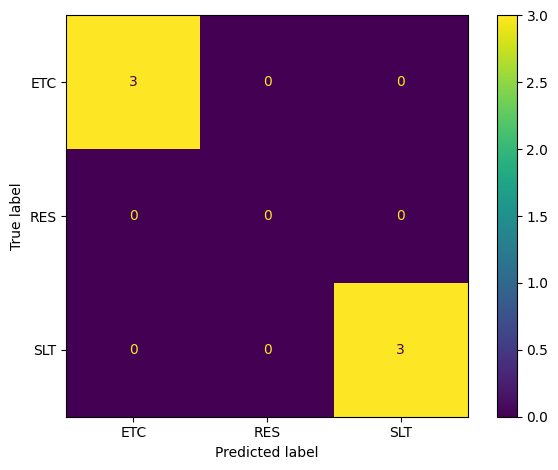

In [32]:
testt = App()
testt.FeatureExtraction()
testt.ModelTraining()
testt.displayEvaluationResults()

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive

/content/drive


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
cd RawData

/content/drive/MyDrive/RawData


In [ ]:
readlink 'cow2.csv'

SyntaxError: ignored